## TITANIC SURVIVAL PREDICTION
**Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.**

**The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [2]:
titanic=pd.read_csv('Titanic-Dataset.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.shape


(891, 12)

In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Analysis

<Axes: xlabel='Survived', ylabel='count'>

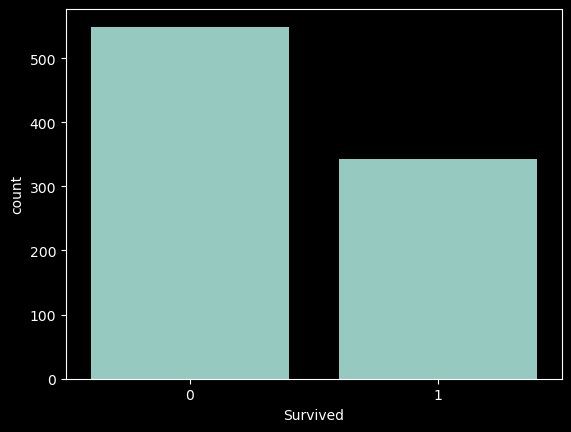

In [14]:
sns.countplot(data=titanic,x='Survived')

##### 0 for death and 1 for survived

<Axes: xlabel='Survived', ylabel='count'>

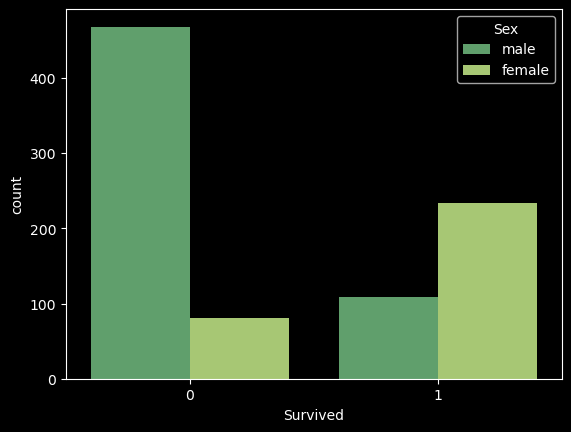

In [15]:
sns.countplot(data=titanic,x='Survived',hue='Sex',palette='summer')

##### More male passengers died and more female are alived

<Axes: xlabel='Survived', ylabel='count'>

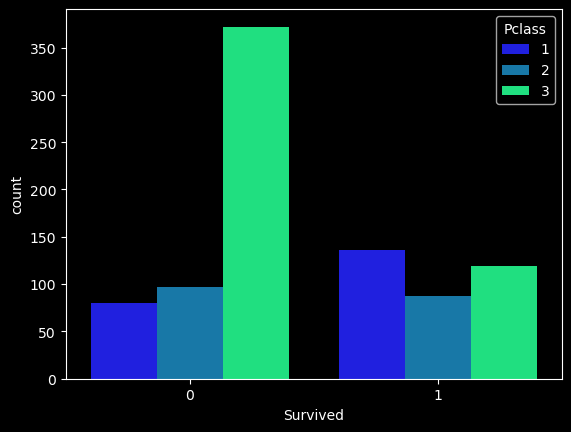

In [16]:
sns.countplot(data=titanic,x='Survived',hue='Pclass',palette='winter')

###### 1st class passengers survived more and 3rd class are likely to die

<Axes: xlabel='Age', ylabel='Count'>

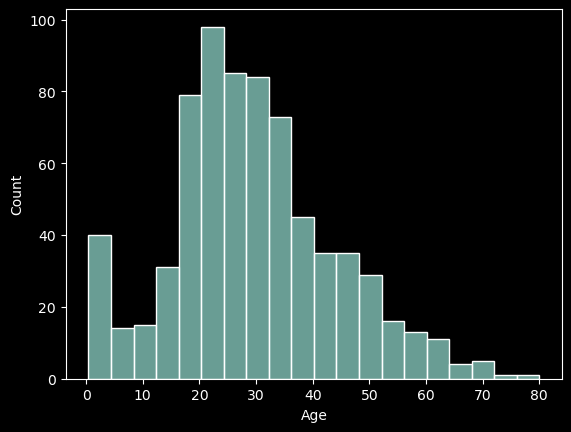

In [17]:
sns.histplot(data=titanic,x='Age')

##### 20-40 age group passengers were present more in the titanic ship

<Axes: xlabel='Fare', ylabel='Count'>

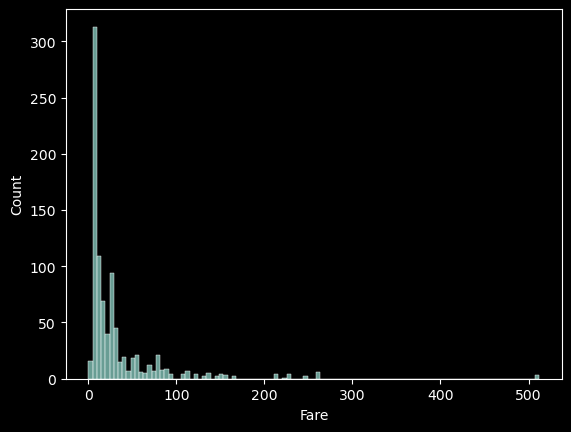

In [18]:
sns.histplot(data=titanic,x='Fare')

##### most of the tickets were bought under fare 100

<Axes: xlabel='SibSp', ylabel='count'>

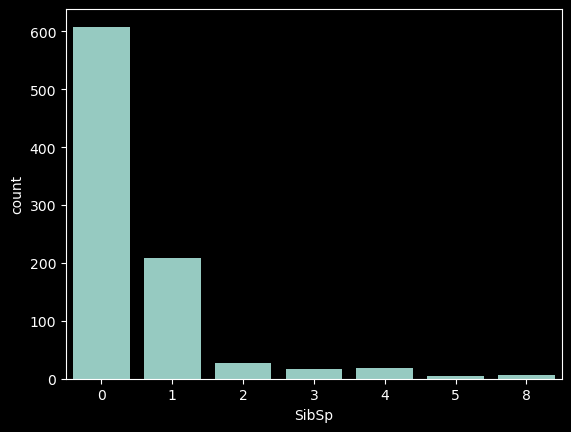

In [19]:
sns.countplot(data=titanic,x='SibSp')

##### Passengers with no siblings/spouse were present more in the Titanic ship

<Axes: xlabel='Parch', ylabel='count'>

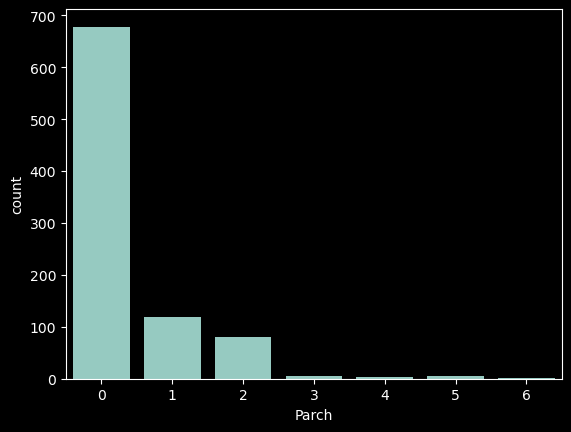

In [22]:
sns.countplot(data=titanic,x='Parch')

##### maximum passengers had no parent/children in the ship

### Data Wrangling

In [24]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

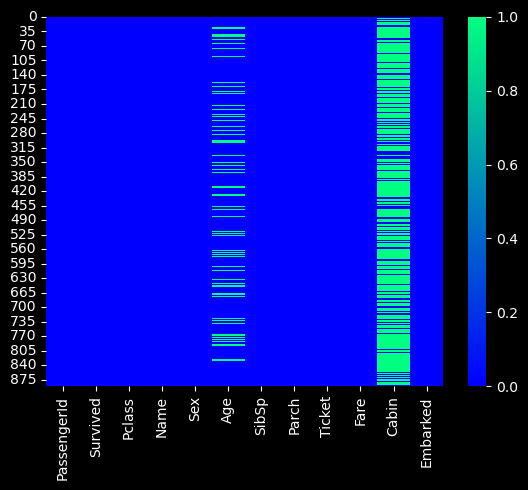

In [26]:
sns.heatmap(titanic.isnull(),cmap='winter')

<Axes: xlabel='Pclass', ylabel='Age'>

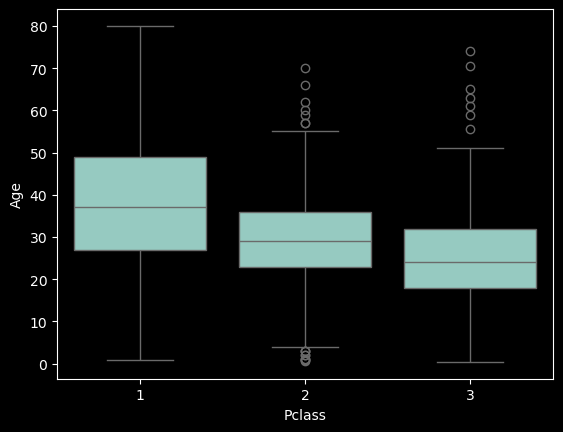

In [27]:
sns.boxplot(data=titanic,x='Pclass',y='Age')

##### There were more young people in 3rd class as compared to 2nd and 1st class

In [28]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

In [29]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
titanic.drop('Cabin',axis=1,inplace=True)

In [31]:
titanic.dropna(inplace=True)

In [32]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [33]:
sex=pd.get_dummies(titanic['Sex'],drop_first=True)
sex.head()

,male
0,True
1,False
2,False
3,False
4,True


In [34]:
embark=pd.get_dummies(titanic['Embarked'],drop_first=True)
embark.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [35]:
pc=pd.get_dummies(titanic['Pclass'],drop_first=True)
pc.head()

,2,3
0,False,True
1,False,False
2,False,True
3,False,False
4,False,True


In [36]:
titanic=pd.concat([titanic,sex,embark,pc],axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True,False,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True,False,True


In [37]:
titanic.drop(['PassengerId','Pclass','Name','Sex','Ticket','Embarked'],axis=1,inplace=True)
titanic.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,True,False,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,False,True,False,True
3,1,35.0,1,0,53.1000,False,False,True,False,False
4,0,35.0,0,0,8.0500,True,False,True,False,True


In [38]:
titanic.replace({True:1,False:0},inplace=True)
titanic.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


### Test and Train Data

In [39]:
titanic.columns=titanic.columns.astype(str)
X=titanic.drop('Survived',axis=1)
y=titanic['Survived']

In [40]:
from sklearn.model_selection import train_test_split


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)


In [42]:
from sklearn.linear_model import LogisticRegression


In [43]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
y_pred=model.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[162  23]
 [ 34  75]]


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       185
           1       0.77      0.69      0.72       109

    accuracy                           0.81       294
   macro avg       0.80      0.78      0.79       294
weighted avg       0.80      0.81      0.80       294



### Model Accuracy

In [49]:
from sklearn.metrics import accuracy_score
print(f'Accuracy={accuracy_score(y_test,y_pred)*100:.2f}%')

Accuracy=80.61%
